In [8]:
#Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
#NLP for text pre-processing
import nltk
import scipy
import re
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
tokenizer = ToktokTokenizer()

In [11]:
# other libraries
import gensim
from gensim.models import Word2Vec
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [12]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

In [13]:
# remove warnings
import warnings
warnings.filterwarnings(action = 'ignore')

In [15]:
data=pd.read_csv("flipkart_com-ecommerce_sample.csv")
data.head()
data.shape

(20000, 15)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [17]:
data['length']=data['description'].str.len()

In [19]:
data['no_of_words'] = data.description.apply(lambda x : len(str(x).split()))

In [24]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.no_of_words, bins=[0,100,300,500,800, np.inf], 
                    labels=['0-100', '100-200', '200-500','500-800' ,'>800'])


In [25]:
words_distribution = data.groupby('bins').size().reset_index(). rename(columns={0:'word_counts'})

Text(0.5, 1.0, 'Word distribution per bin')

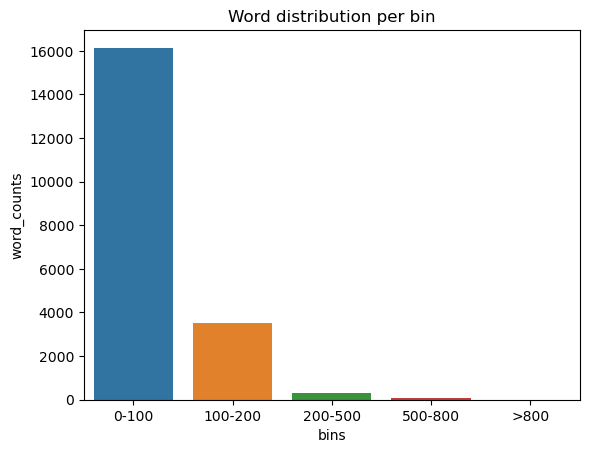

In [28]:
sns.barplot(x='bins', y='word_counts', data=words_distribution).set_title ("Word distribution per bin")

In [29]:
# Number of missing values in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0:'missing'})

In [30]:
# Create a percentage of missing values
missing['percent'] = missing['missing'] / len(data)

In [32]:
# sorting the values in desending order to see highest count on the top 
missing.sort_values('percent', ascending = False)

,missing,percent
brand,5864,0.29320
retail_price,78,0.00390
discounted_price,78,0.00390
product_specifications,14,0.00070
image,3,0.00015
length,2,0.00010
description,2,0.00010
uniq_id,0,0.00000
product_rating,0,0.00000
no_of_words,0,0.00000


In [33]:
# Remove punctuation
data['description'] = data['description'].str.replace(r'[^\w\d\s]', ' ') 
# Replace whitespace between terms with a single space
data['description'] = data['description'].str.replace(r'\s+', ' ')
# Remove leading and trailing whitespace
data['description'] = data['description'].str.replace(r'^\s+|\s+?$', '') 
# converting to lower case
data['description'] = data['description'].str.lower()

In [34]:
data['description'].head()

0    key features of alisha solid women s cycling s...
1    fabhomedecor fabric double sofa bed finish col...
2    key features of aw bellies sandals wedges heel...
3    key features of alisha solid women s cycling s...
4    specifications of sicons all purpose arnica do...
Name: description, dtype: object